# Chapter 1: Introudction to sampling

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random                 # np.random is a random package in numpy. Besides this one, there is a seperate package called random. Some
                              # functions are available in np.random whereas different functions are available in random.
import itertools
from scipy.stats import norm

## 1.1. Sampling and point estimates
Sample is a subset of entire population or. We can also choose sample from available data. <br>
Point estimate and sample statistic are the same. Point estimate is an estimate of population parameter. <br>
Random sampling is when observations are selected from population without any systematic method and each observation has equal probability of being selected.

In [4]:
# Simple sampling with pandas
population= pd.read_feather('spotify_2000_2020.feather')

# Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 
# 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, 
# tempo, and danceability. You'll start by looking at the durations.
# Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

# Sample 1000 rows from spotify_population, assigning to spotify_sample.
spotify_sample= population.sample(n=1000)   # will randomly select 1000 rows with no row repeated

# Calculate the mean duration in minutes from spotify_population using pandas.
mean_dur_pop= population['duration_minutes'].mean()    
    
# Calculate the mean duration in minutes from spotify_sample using pandas.
mean_dur_sample= spotify_sample['duration_minutes'].mean()

#spotify_sample.head()
mean_dur_pop 
#mean_dur_sample

3.8521519140899896

In [6]:
# Simple sampling and calculating with NumPy
# You can also use numpy to calculate parameters or statistics from a list or pandas Series.
# You'll be turning it up to eleven and looking at the loudness property of each song.

# Subset the loudness column from spotify_population to create the pandas Series, loudness_pop.
loudness_pop= population['loudness']

#Sample loudness_pop to get 100 random values, assigning to loudness_samp.
loudness_sample= loudness_pop.sample(n=100)
loudness_sample

# Calculate the mean of loudness_pop using numpy.

mean_loudness_pop= np.mean(loudness_pop)

# Calculate the mean of loudness_samp using numpy.
mean_loudness_sample= np.mean(loudness_sample)

mean_loudness_pop
#mean_loudness_sample



-7.366856851353918

## 1.2. Convineance sampling
Use of the easiest way to collect data, and the sample maybe biased if not representing the whole population. <br>
Always use histogram to see the distribution of data in sample.

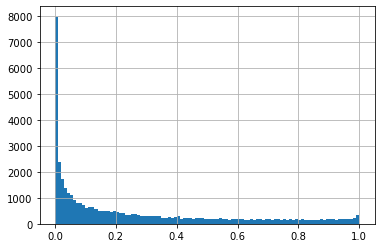

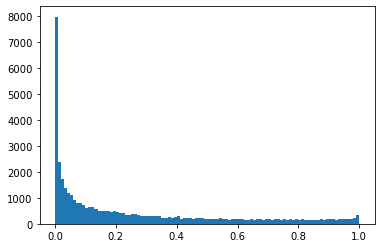

In [7]:
# Are findings from the sample generalizable?
# You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the 
# population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the 
# population and the sample can help determine whether or not the sample is representative of the population.
# The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with 
# instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those 
# songs.

# Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().
population['acousticness'].hist(bins= np.arange(0, 1.01, 0.01))      # the series has values from 0 to 1.
# alternatively, 
fig, ax= plt.subplots()
ax.hist(population['acousticness'], bins= np.arange(0, 1.01, 0.01))
plt.show()                                                          # both the histograms are the same except the grid lines.

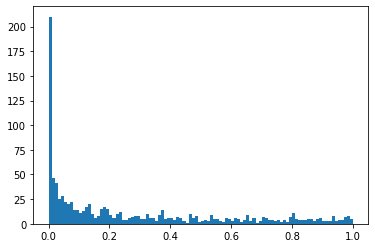

In [8]:
# Update the histogram code to use the spotify_mysterious_sample dataset.
spotify_convineance_sample= population.head(1000)        # still the result seem unbiased.
fig, ax= plt.subplots()
ax.hist(spotify_convineance_sample['acousticness'], bins= np.arange(0, 1.01, 0.01))
plt.show() 

## 1.3. Pseudo-random number generation
The first random number is calculated from a seed value and the next random number is calculated from the first random number and so on. But this process isn't really random in true sense since the numbers are correlated and fututre random numbers can be somewhat predicted.

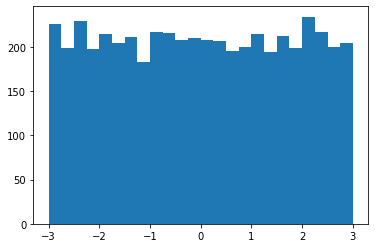

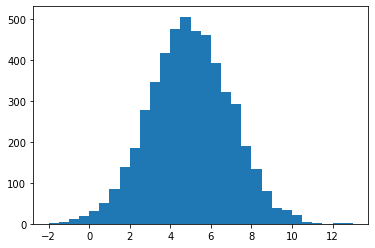

In [9]:
# Generating random numbers
# You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers 
# that follow a statistical distribution, like the uniform distribution or the normal distribution.
# Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to 
# generate.

# Generate 5000 numbers from a uniform distribution, setting the parameters low to -3 and high to 3.
random_uniform= np.random.uniform(-3, 3, size= 5000) # generate 5000 random numbers between -3 and 3 which are distributed uniformly.
random_uniform                                       # np.random_uniform(low= -3, high= 3, size= 5000)

# Generate 5000 numbers from a normal distribution, setting the parameters loc to 5(mean) and scale to 2(sd).
random_normal= np.random.normal(5, 2, size= 5000)    # generate 5000 random numbers that are normally distributed and have mean 5 and sd 2.
random_normal.mean()                                 # np.random.normal(loc= 5, scale= 2, size= 5000)
random_normal.std()
len(random_normal)
random_normal

# Plot a histogram of uniforms with bins of width of 0.25 from -3 to 3 using plt.hist().
fig, ax= plt.subplots()
ax.hist(random_uniform, bins= np.arange(-3, 3.25, 0.25))
plt.show()

# Plot a histogram of normals with bins of width of 0.5 from -2 to 13 using plt.hist().
fig, ax= plt.subplots()
ax.hist(random_normal, bins= np.arange(-2, 13.5, 0.5))
plt.show()

In [10]:
# Understanding random seeds
# While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward 
# conversations with your boss when your script for calculating the sales forecast gives different answers each time.
# Setting the seed for numpy's random number generator helps avoid such problems by making the random number generation reproducible.

np.random.seed(500)
x= np.random.normal(size= 5)  # produce 5 normally distributed numbers based on seed 500 (the starting value)
y= np.random.normal(size= 5)  # x and y should have different values from each other and their values won't change when this command is run
x, y                          # with the same seed (500) each time.

(array([-0.37736358,  0.16675892,  0.68280238,  1.92137877, -0.1970368 ]),
 array([-0.75987876, -2.08906636, -0.03637299, -1.21774918, -1.42890512]))

In [11]:
np.random.seed(123)
x= np.random.normal(size= 5)
np.random.seed(123)
y= np.random.normal(size= 5)  # now both the x and y should have same values since the same seed is set again before y.
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]))

In [12]:
np.random.seed(123)
x= np.random.normal(size= 5)
np.random.seed(456)
y= np.random.normal(size= 5) # now both the x and y should have different values since both are based on different seeds.
x, y

(array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025]),
 array([-0.6681285 , -0.49820952,  0.61857582,  0.56869225,  1.35050948]))

# Chapter 2: Sampling methods

## 2.1. Simple random and systematic sampling
Simple random sampling is when each observation in population has equal probability of being selected in the sample. <br>
Systematic sampling is when there is systematic mechanism behind selection of observations such as selecting every 272 row from the data set. Systematic sampling should only be used when there is no pattern in data set.

In [2]:
# Simple random sampling
# The simplest method of sampling a population is the one you've seen already. It is known as simple random sampling (sometimes abbreviated to
# "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other.
# In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this 
# context means leaving the company.
attrition_pop= pd.read_feather('attrition.feather')
attrition_pop

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,55,0.0,Travel_Rarely,1117,Sales,18,Doctor,Life_Sciences,Low,Female,...,Outstanding,Very_High,0,37,2,Better,10,9,7,7
1466,58,0.0,Non-Travel,350,Sales,2,Bachelor,Medical,Medium,Male,...,Outstanding,Very_High,1,37,0,Good,16,9,14,14
1467,58,0.0,Travel_Rarely,682,Sales,10,Master,Medical,Very_High,Male,...,Excellent,High,0,38,1,Good,37,10,1,8
1468,58,1.0,Travel_Rarely,147,Research_Development,23,Master,Medical,Very_High,Female,...,Excellent,Very_High,1,40,3,Good,40,10,15,6


In [18]:
# Sample 70 rows from attrition_pop using simple random sampling, setting the random seed to 18900217.
attrition_sample= attrition_pop.sample(n= 70, random_state= 18900217)

# Print the sample dataset, attrition_sample. What do you notice about the indices?
attrition_sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,0.0,Travel_Frequently,1410,Sales,3,Below_College,Medical,Very_High,Female,...,Outstanding,Medium,2,6,3,Better,6,5,0,4
1180,36,0.0,Travel_Rarely,530,Sales,2,Master,Life_Sciences,High,Female,...,Excellent,High,0,17,2,Good,13,7,6,7
230,26,0.0,Travel_Rarely,1443,Sales,23,Bachelor,Marketing,High,Female,...,Excellent,High,1,5,2,Good,2,2,0,0
211,29,0.0,Travel_Frequently,410,Research_Development,2,Below_College,Life_Sciences,Very_High,Female,...,Excellent,High,3,4,3,Better,3,2,0,2


In [20]:
# Systematic sampling
# One sampling method that avoids randomness is called systematic sampling. Here, you pick rows from the population at regular intervals.
# For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows 0, 200, 400, 600, 
# and 800.

# Set the sample size to 70.
sample_size= 70
# Calculate the population size from attrition_pop.
population_size= len(attrition_pop)
# Calculate the interval between the rows to be sampled.
interval= population_size // sample_size   
interval                                   # starting from the start of the data frame till the end of the data frame, select every 21st row.


21

In [22]:
#Systematically sample attrition_pop to get the rows of the population at each interval, starting at 0; assign the rows to attrition_sys_samp.
attrition_systematic_sample= attrition_pop[::interval]      # without loc and iloc, [] is used for rows selection only.
attrition_systematic_sample

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,48,0.0,Travel_Rarely,715,Research_Development,1,Bachelor,Life_Sciences,Very_High,Male,...,Excellent,High,0,25,3,Best,1,0,0,0
1386,48,0.0,Travel_Rarely,1355,Research_Development,4,Master,Life_Sciences,High,Male,...,Excellent,Medium,0,27,3,Better,15,11,4,8
1407,50,0.0,Travel_Rarely,989,Research_Development,7,College,Medical,Medium,Female,...,Excellent,Very_High,1,29,2,Good,27,3,13,8
1428,50,0.0,Non-Travel,881,Research_Development,2,Master,Life_Sciences,Low,Male,...,Excellent,Very_High,1,31,3,Better,31,6,14,7


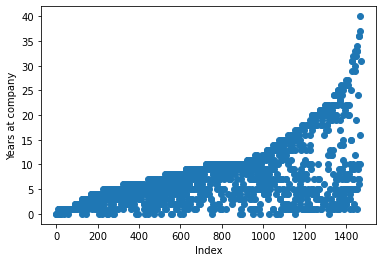

In [40]:
# Is systematic sampling OK?
# Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the 
# resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic 
# sampling is equivalent to simple random sampling.
# Here you'll look at how to determine whether or not there is a problem.

# Add an index column to attrition_pop, assigning the result to attrition_pop_id.
attrition_pop
attrition_pop_id= attrition_pop.reset_index()
attrition_pop_id
# Create a scatter plot of YearsAtCompany versus index for attrition_pop_id using pandas .plot().
fig, ax= plt.subplots()
ax.scatter(attrition_pop_id['index'], attrition_pop_id['YearsAtCompany'])
#ax.plot('index', 'YearsAtCompany', data= attrition_pop_id, kind= 'scatter') # this does not work due to the kind argument
#attrition_pop_id.plot(x= 'index', y= 'YearsAtCompany', kind= 'scatter')      # this works
ax.set_xlabel('Index')
ax.set_ylabel('Years at company')
plt.show()                        # Earlier rows have lower 'YearsAtCompany' values and latter rows have higher 'YearsAtCompany' values.
                                  # Systematic sampling is not recommended and should be avoided in this case since it will be biased.

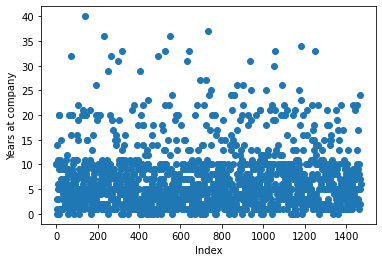

In [42]:
# Randomly shuffle the rows of attrition_pop.
attrition_pop
shuffled= attrition_pop.sample(frac= 1)
shuffled
# Reset the row indexes, and add an index column to attrition_pop.
shuffled= shuffled.reset_index(drop= True)
shuffled
shuffled= shuffled.reset_index()
shuffled
# Repeat the scatter plot of YearsAtCompany versus index, this time using attrition_shuffled.
fig, ax= plt.subplots()
ax.scatter(shuffled['index'], shuffled['YearsAtCompany'])
ax.set_xlabel('Index')
ax.set_ylabel('Years at company')
plt.show()                        # the pattern has disappeared so the systematic sampling is valid now using this shuffled data set.

## 2.2. Stratified and weighted random sampling
It is a tecnique that allows us to sample a population that contains subgroups and all the subgroups should be included in the sample.

In [53]:
# Proportional stratified sampling
# If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the 
# population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes 
# within the population. It is equivalent to performing a simple random sample on each subgroup.

# Get the proportion of employees by Education level from attrition_pop.
education_counts_pop= attrition_pop['Education'].value_counts(normalize= True)
education_counts_pop
# Use proportional stratified sampling on attrition_pop to sample 40% of each Education group, setting the seed to 2022.
attrition_stratified= attrition_pop.groupby('Education').sample(frac= 0.40, random_state= 2022)
attrition_stratified
# Get the proportion of employees by Education level from attrition_strat.
education_counts_strat= attrition_stratified['Education'].value_counts(normalize= True)
education_counts_strat


Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: Education, dtype: float64

In [56]:
# Equal counts stratified sampling
# If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you 
# can use equal counts stratified sampling to generate samples where each subgroup has the same amount of data. For example, if you are 
# analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.

# Use equal counts stratified sampling on attrition_pop to get 30 employees from each Education group, setting the seed to 2022
attrition_equal= attrition_pop.groupby('Education').sample(n= 30, random_state= 2022)
# Get the proportion of employees by Education level from attrition_eq.
attrition_equal['Education'].value_counts(normalize= True)

Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: Education, dtype: float64

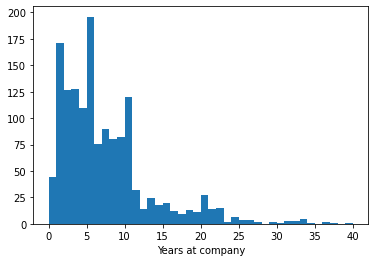

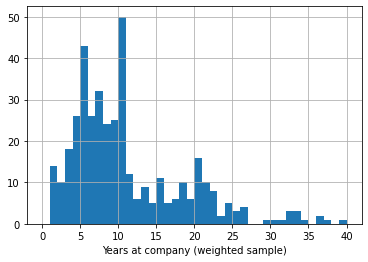

10    0.1250
5     0.1075
7     0.0800
4     0.0650
6     0.0650
9     0.0625
8     0.0600
3     0.0450
20    0.0400
1     0.0350
11    0.0300
15    0.0275
21    0.0250
2     0.0250
18    0.0250
13    0.0225
22    0.0200
19    0.0150
12    0.0150
17    0.0150
16    0.0125
24    0.0125
14    0.0125
26    0.0100
25    0.0075
32    0.0075
33    0.0075
23    0.0050
36    0.0050
29    0.0025
30    0.0025
31    0.0025
34    0.0025
37    0.0025
40    0.0025
Name: YearsAtCompany, dtype: float64

In [81]:
# Weighted sampling
# Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this 
# is weighted sampling, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any 
# given row is proportional to the weight value for that row.

# Plot YearsAtCompany from attrition_pop as a histogram with bins of width 1 from 0 to 40.
fix, ax= plt.subplots()
ax.hist(attrition_pop['YearsAtCompany'], bins= np.arange(0, 41, 1))
ax.set_xlabel('Years at company')
plt.show()

# Sample 400 employees from attrition_pop weighted by YearsAtCompany.
attrition_weight= attrition_pop.sample(n= 400, weights= 'YearsAtCompany')
attrition_weight

# Plot YearsAtCompany from attrition_weight as a histogram with bins of width 1 from 0 to 40.
attrition_weight['YearsAtCompany'].hist(bins= np.arange(0, 41, 1))  # alternative way to create histogram. Second histogram plotted for sample.
plt.xlabel('Years at company (weighted sample)')
plt.show()


attrition_weight['YearsAtCompany'].value_counts(normalize=True) # 10 years are the most frequent, followed by 5, 7, 9, 8, 20 years and so on.
                                                                # 13.75% of 400 rows have 10 'YearsAtCompany' value and so on. Thus, the number
                                                                # of rows selected in the sample are based on the counts of values in 'YearsAt
                                                                # Company' variable. The mean in sample (second graph, about 10) is higher than 
                                                                # mean in population (first graph, about 6).

## 2.3. Cluster sampling
It is done when it is not feasible to include all subgroups in a sample. Thus, first a few subgroups are randomly selected from all the available subgroups in the population and then observations from each selected subgroup are randomly drawn. So, random sampling is done twice.

In [56]:
# Performing cluster sampling
# Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the JobRole column of the 
# attrition dataset. You can think of each job role as a subgroup of the whole population of employees.
attrition_pop= pd.read_feather('attrition.feather')
attrition_pop

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,55,0.0,Travel_Rarely,1117,Sales,18,Doctor,Life_Sciences,Low,Female,...,Outstanding,Very_High,0,37,2,Better,10,9,7,7
1466,58,0.0,Non-Travel,350,Sales,2,Bachelor,Medical,Medium,Male,...,Outstanding,Very_High,1,37,0,Good,16,9,14,14
1467,58,0.0,Travel_Rarely,682,Sales,10,Master,Medical,Very_High,Male,...,Excellent,High,0,38,1,Good,37,10,1,8
1468,58,1.0,Travel_Rarely,147,Research_Development,23,Master,Medical,Very_High,Female,...,Excellent,Very_High,1,40,3,Good,40,10,15,6


In [57]:
# Create a list of unique JobRole values from attrition_pop, and assign to job_roles_pop.
job_roles_pop= list(attrition_pop['JobRole'].unique())
job_roles_pop
# Randomly sample four JobRole values from job_roles_pop.
job_roles_sample= random.sample(job_roles_pop, k= 4)
# Subset attrition_pop for the sampled job roles by filtering for rows where JobRole is in job_roles_samp.
jobrole_condition= attrition_pop['JobRole'].isin(job_roles_sample)
jobrole_condition
attrition_filtered= attrition_pop[jobrole_condition]
attrition_filtered

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
7,18,1.0,Non-Travel,247,Research_Development,8,Below_College,Medical,High,Male,...,Excellent,Very_High,0,0,0,Better,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,49,0.0,Travel_Rarely,527,Research_Development,8,College,Other,Low,Female,...,Excellent,High,1,29,3,Good,26,9,1,7
1422,53,0.0,Travel_Frequently,124,Sales,2,Bachelor,Marketing,High,Female,...,Excellent,Low,1,30,2,Better,15,7,6,12
1454,53,0.0,Travel_Rarely,661,Sales,7,College,Marketing,Low,Female,...,Excellent,Very_High,1,35,3,Better,5,2,0,4
1458,56,0.0,Travel_Frequently,906,Sales,6,Bachelor,Life_Sciences,High,Female,...,Excellent,Very_High,3,36,0,Good,7,7,7,7


In [59]:
# just for confirmation
attrition_filtered['JobRole'].shape
# ['Research_Scientist', 'Laboratory_Technician', 'Human_Resources', 'Sales_Executive']

(929,)

In [60]:
# Just for understanding .cat.remaove_unuseed_categories() method
# For each job role in the filtered dataset, take a random sample of ten rows, setting the seed to 2022.
attrition_cluster= attrition_filtered.groupby('JobRole').sample(n=10, random_state= 2022)
attrition_cluster  # THIS WOULD THROW AN ERROR WITHOUT USING THAT .cat.remove_unused_categories() method - see below.

ValueError: a must be greater than 0 unless no samples are taken

In [64]:
# Remove any unused categories from JobRole. # Remove categories with no rows
attrition_filtered['JobRole']= attrition_filtered['JobRole'].cat.remove_unused_categories()  # After this, above command works as shown below
attrition_filtered['JobRole'].shape # the number of rows remains same. It seems those categories included in job_role_sample but having no
                                    # no rows in the dataframe attrition_filtered are removed here.
# For each job role in the filtered dataset, take a random sample of ten rows, setting the seed to 2022.
attrition_cluster= attrition_filtered.groupby('JobRole').sample(n=10, random_state= 2022)
attrition_cluster

#attrition_filtered['JobRole'].unique()  # the job roles are still the same so what has been removed by the method.
#attrition_filtered['JobRole'].shape     # this is also the same. So, may be I should google the method to see what it does.

<ipython-input-64-7174173e9b25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole']= attrition_filtered['JobRole'].cat.remove_unused_categories()  # After this, above command works as shown below


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1348,44,1.0,Travel_Rarely,1376,Human_Resources,1,College,Medical,Medium,Male,...,Excellent,Very_High,1,24,1,Better,20,6,3,6
886,41,0.0,Non-Travel,552,Human_Resources,4,Bachelor,Human_Resources,High,Male,...,Excellent,Medium,1,10,4,Better,3,2,1,2
983,39,0.0,Travel_Rarely,141,Human_Resources,3,Bachelor,Human_Resources,High,Female,...,Excellent,High,1,12,3,Bad,8,3,3,6
88,27,1.0,Travel_Frequently,1337,Human_Resources,22,Bachelor,Human_Resources,Low,Female,...,Excellent,Low,0,1,2,Better,1,0,0,0
189,34,0.0,Travel_Rarely,829,Human_Resources,3,College,Human_Resources,High,Male,...,Excellent,High,1,4,1,Bad,3,2,0,2
160,24,0.0,Travel_Frequently,897,Human_Resources,10,Bachelor,Medical,Low,Male,...,Excellent,Very_High,1,3,2,Better,2,2,2,1
839,46,0.0,Travel_Rarely,991,Human_Resources,1,College,Life_Sciences,Very_High,Female,...,Excellent,High,0,10,3,Best,7,6,5,7
966,30,0.0,Travel_Rarely,1240,Human_Resources,9,Bachelor,Human_Resources,High,Male,...,Excellent,Very_High,0,12,2,Bad,11,9,4,7
162,28,0.0,Non-Travel,280,Human_Resources,1,College,Life_Sciences,High,Male,...,Excellent,Medium,1,3,2,Better,3,2,2,2
1231,37,0.0,Travel_Rarely,1239,Human_Resources,8,College,Other,High,Male,...,Excellent,High,0,19,4,Good,10,0,4,7


## 2.4. Comparing sampling methods

In [66]:
# 3 kinds of sampling
# You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to
# set up the samples.
# You'll use the RelationshipSatisfaction column of the attrition_pop dataset, which categorizes the employee's relationship with the company.
# It has four levels: Low, Medium, High, and Very_High. pandas has been loaded with its usual alias, and the random package has been loaded.

# Perform simple random sampling on attrition_pop to get one-quarter of the population, setting the seed to 2022.
attrition_srs= attrition_pop.sample(frac= 1/4, random_state= 2022)
attrition_srs

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
186,37,0.0,Travel_Rarely,1225,Research_Development,10,College,Life_Sciences,Very_High,Male,...,Excellent,Low,0,4,2,Better,1,0,0,0
743,34,0.0,Travel_Frequently,1069,Research_Development,2,Below_College,Life_Sciences,Very_High,Male,...,Excellent,High,0,10,2,Good,10,9,1,9
414,37,0.0,Travel_Frequently,1278,Sales,1,Master,Medical,High,Male,...,Excellent,High,2,6,2,Good,6,3,1,3
1383,44,0.0,Travel_Rarely,1199,Research_Development,4,College,Life_Sciences,High,Male,...,Excellent,Very_High,2,26,4,Good,25,9,14,13
850,35,0.0,Travel_Frequently,200,Research_Development,18,College,Life_Sciences,High,Male,...,Excellent,High,0,10,2,Better,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,22,1.0,Travel_Rarely,617,Research_Development,3,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,4,3,Best,3,2,0,2
659,27,0.0,Travel_Rarely,975,Research_Development,7,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,9,2,Bad,7,6,0,7
873,39,0.0,Travel_Rarely,1387,Research_Development,10,Doctor,Medical,Medium,Male,...,Excellent,Very_High,3,10,3,Better,7,7,7,7
637,34,0.0,Travel_Rarely,629,Research_Development,27,College,Medical,Very_High,Female,...,Excellent,Very_High,0,9,3,Better,3,2,1,2


In [68]:
# Perform stratified sampling on attrition_pop to sample one-quarter of each RelationshipSatisfaction group, setting the seed to 2022.
attrition_stratified= attrition_pop.groupby('RelationshipSatisfaction').sample(frac= 1/4, random_state= 2022)
attrition_stratified

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1381,45,1.0,Travel_Rarely,1449,Sales,2,Bachelor,Marketing,Low,Female,...,Excellent,Low,0,26,2,Better,24,10,1,11
1357,42,0.0,Travel_Rarely,300,Research_Development,2,Bachelor,Life_Sciences,Low,Male,...,Excellent,Low,0,24,2,Good,22,6,4,14
924,30,0.0,Travel_Rarely,288,Research_Development,2,Bachelor,Life_Sciences,High,Male,...,Excellent,Low,3,11,3,Better,11,10,10,8
1224,46,0.0,Travel_Rarely,1003,Research_Development,8,Master,Life_Sciences,Very_High,Female,...,Outstanding,Low,3,19,2,Better,16,13,1,7
1277,48,0.0,Travel_Rarely,1236,Research_Development,1,Master,Life_Sciences,Very_High,Female,...,Excellent,Low,1,21,3,Bad,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,27,0.0,Travel_Rarely,608,Research_Development,1,College,Life_Sciences,High,Female,...,Excellent,Very_High,0,9,3,Better,9,7,0,7
1333,55,0.0,Travel_Rarely,282,Research_Development,2,College,Medical,Very_High,Female,...,Excellent,Very_High,1,23,5,Better,19,9,9,11
1457,55,0.0,Travel_Rarely,692,Research_Development,14,Master,Medical,High,Male,...,Excellent,Very_High,0,36,3,Better,24,15,2,15
890,30,0.0,Travel_Frequently,1312,Research_Development,2,Master,Technical_Degree,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,9,7,0,7


In [77]:
# Create a list of unique values from attrition_pop's RelationshipSatisfaction column.
satisfaction_unique= list(attrition_pop['RelationshipSatisfaction'].unique())
satisfaction_unique
# Randomly sample satisfaction_unique to get two values.
satisfaction_sample= random.sample(satisfaction_unique, k= 2)
satisfaction_sample

['Low', 'Medium']

In [123]:
# Subset the population for rows where RelationshipSatisfaction is in satisfaction_samp and clear any unused categories from 
# RelationshipSatisfaction; assign to attrition_clust_prep.
condition= attrition_pop['RelationshipSatisfaction'].isin(satisfaction_sample)
condition
attrition_clust_prep= attrition_pop[condition]
attrition_clust_prep
# (attrition_clust_prep['RelationshipSatisfaction'] == 'Medium').sum() # check the total counts of each selected subgroup
attrition_clust_prep['RelationshipSatisfaction']= attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
attrition_clust_prep['RelationshipSatisfaction']
# Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the population and setting the seed to 2022.
# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop

attrition_cluster= attrition_clust_prep.groupby('RelationshipSatisfaction').sample(n= len(attrition_pop) // 6, random_state= 2022)
attrition_cluster

<ipython-input-123-4c3fd902047c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction']= attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1381,45,1.0,Travel_Rarely,1449,Sales,2,Bachelor,Marketing,Low,Female,...,Excellent,Low,0,26,2,Better,24,10,1,11
1357,42,0.0,Travel_Rarely,300,Research_Development,2,Bachelor,Life_Sciences,Low,Male,...,Excellent,Low,0,24,2,Good,22,6,4,14
924,30,0.0,Travel_Rarely,288,Research_Development,2,Bachelor,Life_Sciences,High,Male,...,Excellent,Low,3,11,3,Better,11,10,10,8
1224,46,0.0,Travel_Rarely,1003,Research_Development,8,Master,Life_Sciences,Very_High,Female,...,Outstanding,Low,3,19,2,Better,16,13,1,7
1277,48,0.0,Travel_Rarely,1236,Research_Development,1,Master,Life_Sciences,Very_High,Female,...,Excellent,Low,1,21,3,Bad,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,55,0.0,Travel_Frequently,1091,Research_Development,2,Below_College,Life_Sciences,Very_High,Male,...,Excellent,Medium,1,23,4,Better,3,2,1,2
134,26,0.0,Travel_Rarely,1349,Research_Development,23,Bachelor,Life_Sciences,Low,Female,...,Outstanding,Medium,2,3,3,Bad,3,2,0,2
11,30,0.0,Travel_Rarely,1358,Research_Development,24,Below_College,Life_Sciences,Very_High,Male,...,Outstanding,Medium,1,1,2,Better,1,0,0,0
254,25,0.0,Travel_Rarely,891,Sales,4,College,Life_Sciences,Medium,Female,...,Excellent,Medium,0,5,3,Better,5,4,1,3


In [104]:
len(attrition_pop) // 6

245

In [107]:
# Comparing point estimates

# Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population
# parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the 
# population.
# Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the 
# proportion of employees who left the company (they have an Attrition value of 1) for each value of RelationshipSatisfaction.
# attrition_pop, attrition_srs, attrition_strat, and attrition_clust are available; pandas is loaded with its usual alias.

# Group attrition_pop by RelationshipSatisfaction levels and calculate the mean of Attrition for each level.
mean_attrition_pop= attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_pop

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64

In [110]:
#Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the simple random sample, attrition_srs.
attrition_srs
mean_attrition_srs= attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_srs

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64

In [114]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the stratified sample, attrition_strat.
attrition_stratified
mean_attrition_stratified= attrition_stratified.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_stratified

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64

In [122]:
# Calculate the proportion of employee attrition for each relationship satisfaction group, this time on the cluster sample, attrition_clust
attrition_cluster
mean_attrition_cluster= attrition_cluster.groupby('RelationshipSatisfaction')['Attrition'].mean()
mean_attrition_cluster


RelationshipSatisfaction
Low       0.191837
Medium    0.142857
Name: Attrition, dtype: float64

# Chapter 3: Sampling distributions

## 3.1. Relative error of point estimates
As sample size increases, the relative error decreases which means the sample mean gets closer to the population mean.

In [126]:
# Calculating relative errors
# The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when
# you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.
# The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the 
# point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.
# attrition_pop and mean_attrition_pop (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as pd.

# Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022
attrition_srs50= attrition_pop.sample(n= 50, random_state= 2022)
attrition_srs50

# Calculate the mean employee Attrition in the sample.
mean_attrition_srs50= attrition_srs50['Attrition'].mean()
mean_attrition_srs50

0.06

In [129]:
# Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.
mean_attrition_pop= attrition_pop['Attrition'].mean()
mean_attrition_pop
relative_error_pct50= 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop
relative_error_pct50

62.78481012658227

In [130]:
# Calculate the relative error percentage again. This time, use a simple random sample of one hundred rows of attrition_pop.
attrition_srs100= attrition_pop.sample(n= 100, random_state= 2022)
mean_attrition_srs100= attrition_srs100['Attrition'].mean()
mean_attrition_srs100

0.15

In [131]:
relative_error_pct100= 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop
relative_error_pct100   # the relative error has been reduced just by increasing the sample size from 50 to 100

6.962025316455695

## 3.2. Creating a sampling distribution
By generating the sample statistic many times with different samples, you can quantify the amount of variation in those statistics. <br>
As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

In [135]:
# Replicating samples
# When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. 
# That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many 
# samples and calculate the sample mean (or another statistic) for each sample.
# attrition_pop is available; pandas and matplotlib.pyplot are loaded with their usual aliases.

# Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.
mean_attritions= []
for i in range(500):
    mean_attritions.append(attrition_pop.sample(n= 60)['Attrition'].mean())

print(mean_attritions[0:5])

[0.1, 0.1, 0.2, 0.11666666666666667, 0.15]


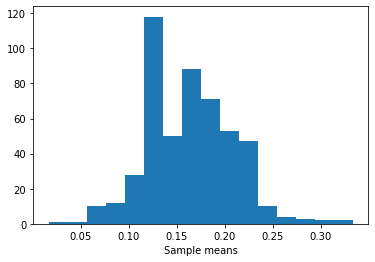

In [137]:
# Draw a histogram of the mean_attritions list with 16 bins.
fig, ax= plt.subplots()
ax.hist(mean_attritions, bins= 16)
ax.set_xlabel('Sample means')
plt.show()

## 3.3. Approximate sampling distributions
The exact sampling distribution shows all possible variations of the point estimate that you are interested in. <br>
Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise. <br>
The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used.

In [204]:
# Exact sampling distribution
# To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and 
# how often. That is, you need to know its distribution.
# The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an 
# approximation, it is known as the exact sampling distribution.
# Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)
# pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases. The expand_grid() function is also available, which expects a 
# dictionary of key-value pairs as its argument. The definition of the expand_grid() function is provided in the pandas documentation.

# Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows 
# should contain all possibilities for throwing five dice, each numbered 1 to 8.
def expand_grid(data_dict):     # expand_grid() is not already available in any python or in any package. I copied it from documentation.
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

dice = expand_grid({                       # creates all the possible combinations of 5 8-sided dice and returns the data frame.
    'die1': [1, 2, 3, 4, 5, 6, 7, 8],
    'die2': [1, 2, 3, 4, 5, 6, 7, 8],
    'die3': [1, 2, 3, 4, 5, 6, 7, 8],
    'die4': [1, 2, 3, 4, 5, 6, 7, 8],
    'die5': [1, 2, 3, 4, 5, 6, 7, 8]    
})

# Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.
dice['mean_roll']= (dice['die1'] + dice['die2'] + dice['die3'] + dice['die4'] + dice['die5']) / 5
dice['mean_roll']= dice['mean_roll'].astype('category')   # to apply value_counts() method and create histogram/bar chart.
dice
count= dice['mean_roll'].value_counts(sort=False)
df_count= pd.DataFrame(count)   # the data frame created so that ax.bar() can be applied. Alternative, given below.
df_count= df_count.reset_index()
df_count= df_count.rename(columns= {'index': 'counts'})
df_count.head()

,counts,mean_roll
0,1.0,1
1,1.2,5
2,1.4,15
3,1.6,35
4,1.8,70


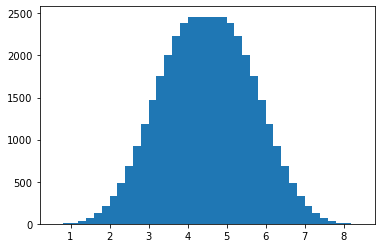

<AxesSubplot:>

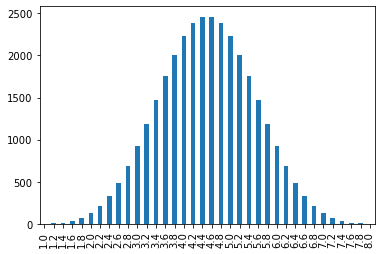

In [182]:
# Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll in increasing order from 1.0 to 8.0.
fig, ax= plt.subplots()
ax.bar(df_count['counts'], df_count['mean_roll'])
plt.show()

# alternatively
dice['mean_roll'].value_counts(sort= False).plot(kind= 'bar')


In [186]:
# Generating an approximate sampling distribution
# Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of 
# possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or 
# thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.
# In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can 
# repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

# Sample one to eight, five times, with replacement. Assign to five_rolls.
five_rolls= np.random.choice(list(range(1, 9)), size= 5, replace= True)
five_rolls
#Calculate the mean of five_rolls.
five_rolls.mean() 

4.4

In [190]:
# Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
sample_means_1000= []
for i in range(1, 1001):
    sample_means_1000.append(np.random.choice(list(range(1, 9)), size= 5, replace= True).mean()) # choose a sample of 5, calculate their mean,
                                                                                                 # and add it to the list. This is a sample
sample_means_1000[0:5]                                                                           # distribution of means.

[4.0, 5.4, 5.8, 5.0, 3.6]

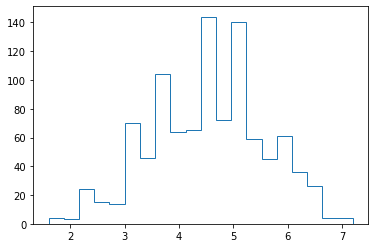

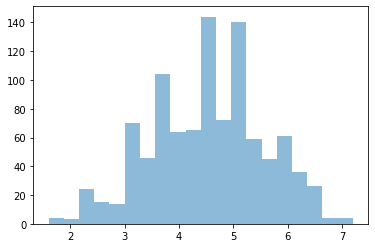

In [203]:
# lot sample_means_1000 as a histogram with 20 bins.
fig, ax= plt.subplots()
ax.hist(sample_means_1000, bins= 20, histtype= 'step')
plt.show()

plt.hist(sample_means_1000, bins= 20, alpha= 0.5) # both are essential the same
plt.show()

## 3.4. Standard errors and the Central Limit Theorem
The means of independently drawn and sufficiently large samples are normally distributed when enough samples are selected and their means computed. <br>
Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean. Even for small sample sizes, the mean of the sampling distribution is a good approximation of the population mean. <br>
The amount of variation in the sampling distribution is related to the amount of variation in the population and the sample size. This is another consequence of the Central Limit Theorem.

In [228]:
# Population & sampling distribution means
# One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on 
# them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.
# Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean 
# attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample
# size of 5 for each replicate, one used 50, and one used 500.
# attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

# for sample size= 5
sampling_distribution_5= []
for i in range(1, 1001):
    sampling_distribution_5.append(attrition_pop.sample(n=5)['Attrition'].mean())

# for sample size= 50
sampling_distribution_50= []
for i in range(1, 1001):
    sampling_distribution_50.append(attrition_pop.sample(n=50)['Attrition'].mean())
    
# for sample size= 500
sampling_distribution_500= []
for i in range(1, 1001):
    sampling_distribution_500.append(attrition_pop.sample(n=500)['Attrition'].mean())


In [218]:
# check the lists created above
# sampling_distribution_5[0:5]
# sampling_distribution_50[0:5]
# sampling_distribution_100[0:5]

[0.0, 0.2, 0.0, 0.4, 0.4]

In [229]:
# Calculate the mean of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a mean of sample means). Each of 
# these lists contains 1000 means.

mean_of_means_5= np.mean(sampling_distribution_5)
mean_of_means_50= np.mean(sampling_distribution_50)
mean_of_means_500= np.mean(sampling_distribution_500)

mean_pop= attrition_pop['Attrition'].mean()

# mean_pop
# mean_of_means_5
# mean_of_means_50      # the mean of a sampling distribution regardless of a sample size is close to population mean.
# mean_of_means_500

In [234]:
# Population & sampling distribution variation
# You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly,
# as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the 
# population parameter's standard deviation and the sample size.
# attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy is loaded with its usual 
# alias.

# Calculate the standard deviation of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a standard deviation of 
# sample means).
sd_pop= attrition_pop['Attrition'].std(ddof= 0)                # ddof= 0 for population standard deviaiton
sd_of_means_5= np.std(sampling_distribution_5, ddof= 1)        # ddof= 1 for sample standard deviation
sd_of_means_50= np.std(sampling_distribution_50, ddof= 1)
sd_of_means_500= np.std(sampling_distribution_500, ddof= 1)

# sd_pop                            # 0.3677   # this is the standard deviation of Attrition in population.
# sd_of_means_5                     # 0.1605   # this is the standard deviation of the sampling distribution of means when sample size is 5.     
# sd_of_means_50                    # 0.0502   # this is the standard deviation of the sampling distribution of means when sample size is 50.
# sd_of_means_500                   # 0.0135   # this is the standard deviation of the sampling distribution of means when sample size is 500.
                                               # When sample size increases, the sampling distribution of means becomes narrow and gets closer
                                               # to normal distribution. This standard deviation is also called standard error and the lesser
                                               # it is, the narrower the sampling distribution is, and the closer is its mean (mean of means)
                                               # to the population mean.
                                               # Also remember that the standard deviation of the sampling distribution is approximately equal
                                               # to the population standard deviation divided by the square root of the sample size.

# Chapter 4: Bootstrap distributions

## 4.1. Introduction to Bootstrapping
Bootstrapping is the opposite of sampling from population. With sampling, we treat the dataset as a population and move to (select) a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population. Bootstrapping is important when we are not able to sample population multiple times to create a sampling distribution. Bootstrapping has the following three steps. <br>
> Make a resample of the same size as the original sample. <br> Calculate the statistic of interest such as a mean of one of the columns for this bootstrap sample. <br> Repeat steps 1 and 2 many times to lots of these bootstrap statistics.

The resulting statistics are bootstrap statistics, and they form a bootstrap distribution. <br>
The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.



In [238]:
# Generating a bootstrap distribution
# The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is
# different.
# To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start
# with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested 
# in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.
# Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called
# 'index' has been added, and only the artist name, song name, and danceability columns have been included.
# spotify_sample is available; pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

spotify_pop= pd.read_feather('spotify_2000_2020.feather')
spotify_pop

spotify_sample= spotify_pop[['artists', 'name', 'danceability']].reset_index()
spotify_sample

,index,artists,name,danceability
0,0,['David Bauer'],Shout to the Lord,0.567
1,1,['Etta James'],Miss You,0.821
2,2,['Quasimoto'],Real Eyes,0.706
3,3,['Millencolin'],Penguins & Polarbears,0.368
4,4,['Steve Chou'],黃昏,0.501
...,...,...,...,...
41651,41651,"['DripReport', 'Tyga']",Skechers (feat. Tyga) - Remix,0.875
41652,41652,"['Leon Bridges', 'Terrace Martin']",Sweeter (feat. Terrace Martin),0.719
41653,41653,"['Kygo', 'Oh Wonder']",How Would I Know,0.514
41654,41654,"['Cash Cash', 'Andy Grammer']",I Found You,0.646


In [241]:
# Generate a single bootstrap resample from spotify_sample.
spotify_1_resample= spotify_sample.sample(frac= 1, replace= True)

In [243]:
spotify_1_resample
# Calculate the mean of the danceability column of spotify_1_resample using numpy.
mean_danceability_1= spotify_1_resample['danceability'].mean()
mean_danceability_1

0.5916828932206609

In [244]:
# both the methods give same mean.
mean_danceability_1= np.mean(spotify_1_resample['danceability'])
mean_danceability_1

0.5916828932206609

In [247]:
# Replicate the expression provided 1000 times.
mean_danceability_1000= []

for i in range(1, 1001):
    mean_danceability_1000.append(np.mean(spotify_sample.sample(frac= 1, replace= True)['danceability']))
    
mean_danceability_1000[0:5]

[0.5897455012483194,
 0.5907134098329173,
 0.5903888875552179,
 0.5904083493374267,
 0.5919414946226236]

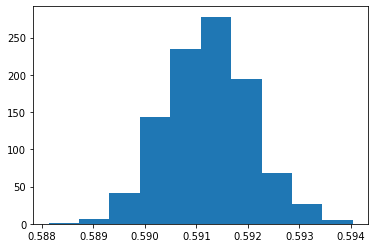

In [248]:
# Create a bootstrap distribution by drawing a histogram of mean_danceability_1000.
plt.hist(mean_danceability_1000)
plt.show()            # approximates population parameters such as mean and sd for the variable of interest.
# From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of 
# statistics, we can even quantify how accurate our estimate is (this depends on the spread of the distribution).

## 4.2. Comparing sampling and bootstrap distributions
If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors (for estimating population standard deviation). <br>
This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.


In [255]:
# Sampling distribution vs. bootstrap distribution
# The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population 
# (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to 
# see how they are related.
# Here, the statistic you are interested in is the mean popularity score of the songs.
# spotify_population (the whole dataset) and spotify_sample (500 randomly sampled rows from spotify_population) are available; pandas and 
# numpy are loaded with their usual aliases.
spotify_pop
spotify_sample= spotify_pop.reset_index().sample(n= 500)
spotify_sample

,index,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
25043,25043,0.011900,"['Thomas Rhett', 'Kane Brown', 'Ava Max']",0.548,164683.0,2.744717,0.721,0.0,7k6tAZp4m93oswrPqSfBbc,0.000000,...,0.2160,-4.466,1.0,On Me (feat. Ava Max),78.0,2020-05-15,0.0472,177.918,0.594,2020.0
7863,7863,0.906000,['Sam Smith'],0.289,253959.0,4.232650,0.334,0.0,4dtU73n96G2Qutw4rJ7cOc,0.000017,...,0.0938,-8.042,1.0,Drowning Shadows,61.0,2015-11-06,0.0311,67.916,0.287,2015.0
11658,11658,0.890000,['Garth Stevenson'],0.474,181930.0,3.032167,0.214,0.0,4Au9OanTJndu5e2IS4eqKC,0.949000,...,0.1020,-20.292,0.0,A Love Song,50.0,2011-06-14,0.0303,102.024,0.334,2011.0
20949,20949,0.008340,['Linkin Park'],0.555,216800.0,3.613333,0.844,0.0,3tSmXSxaAnU1EPGKa6NytH,0.000000,...,0.0895,-6.567,0.0,In the End,63.0,2000-10-24,0.0554,105.195,0.464,2000.0
25081,25081,0.035200,['Radiohead'],0.615,309093.0,5.151550,0.931,0.0,7xqeIdLJSf3bgmZ7vUvHrE,0.000024,...,0.0914,-7.800,1.0,Idioteque,59.0,2000-10-01,0.2400,137.544,0.530,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11163,11163,0.456000,['Crazy Frog'],0.641,177200.0,2.953333,0.943,0.0,0h1fMeDZFMwGiWiHkIbBcp,0.000820,...,0.2270,-2.712,1.0,We Are The Champions (Ding A Dang Dong) - Radi...,43.0,2006-01-01,0.0802,129.990,0.333,2006.0
14386,14386,0.046600,"['Ski Mask The Slump God', 'Lil Yachty']",0.862,167040.0,2.784000,0.521,1.0,3clpchqQ6A3p8jjPgKdhk0,0.000050,...,0.1190,-10.355,1.0,Cat Piss (feat. Lil Yachty),60.0,2018-11-30,0.4470,154.983,0.373,2018.0
13290,13290,0.068200,['Beyoncé'],0.796,210240.0,3.504000,0.572,0.0,3JdDBUiZ1UJv7J7RQqxEFF,0.000008,...,0.1350,-7.019,0.0,Green Light,48.0,2007-05-29,0.0634,107.045,0.726,2007.0
8127,8127,0.007540,"['Comethazine', 'Ugly God']",0.944,87313.0,1.455217,0.752,1.0,63KKvdfkStMHQM4Ufzx2KB,0.010700,...,0.1410,-2.625,0.0,Let It Eat (feat. Ugly God),61.0,2018-08-24,0.1350,134.039,0.489,2018.0


In [258]:
# Generate a sampling distribution of 2000 replicates.
# Sample 500 rows of the population without replacement and calculate the mean popularity.
mean_popularity_2000_sample= []
for i in range(1, 2001):
    mean_popularity_2000_sample.append(np.mean(spotify_pop.sample(n= 500)['popularity']))
    
mean_popularity_2000_sample[0:10]

[55.648, 54.712, 54.464, 55.218, 54.46, 53.632, 54.544, 55.194, 53.99, 55.184]

In [262]:
# Generate a bootstrap distribution of 2000 replicates.
# Sample 500 rows of the sample with replacement and calculate the mean popularity.
mean_popularity_2000_boot= []
for i in range(1, 2001):
    mean_popularity_2000_boot.append(np.mean(spotify_sample.sample(n= 500, replace= True)['popularity']))
    
mean_popularity_2000_boot[0:10]

# The sampling distribution and bootstrap distribution are closely related, and so is the code to generate them.

[56.328, 54.97, 55.732, 55.67, 55.744, 55.338, 54.872, 55.462, 54.82, 54.84]

In [265]:
# Compare sampling and bootstrap means
# To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a 
# sample size of 5000.
# spotify_population, spotify_sample, sampling_distribution, and bootstrap_distribution are available; pandas and numpy are loaded with their 
# usual aliases.

spotify_pop
spotify_sample= spotify_pop.reset_index().sample(n= 5000)
spotify_sample

# for sampling distribution
mean_popularity_5000_sample= []
for i in range(1, 5001):
    mean_popularity_5000_sample.append(np.mean(spotify_pop.sample(n= 5000)['popularity']))

sampling_distribution= mean_popularity_5000_sample

# for bootstrap distribution
mean_popularity_5000_boot= []
for i in range(1, 5001):
    mean_popularity_5000_boot.append(np.mean(spotify_sample.sample(n= 5000, replace= True)['popularity']))

bootstrap_distribution= mean_popularity_5000_boot

# sampling_distribution[0:10]
# bootstrap_distribution[0:10]

In [268]:
# Calculate the mean popularity in 4 ways:

# Population: from spotify_population, take the mean of popularity.
population_mean= spotify_pop['popularity'].mean()

# Sample: from spotify_sample, take the mean of popularity.
sample_mean= spotify_sample['popularity'].mean()

# Sampling distribution: from sampling_distribution, take its mean.
sampling_distribution_mean= np.mean(sampling_distribution)

# Bootstrap distribution: from bootstrap_distribution, take its mean.
bootstrap_distribution_mean= np.mean(bootstrap_distribution)

In [294]:
# population_mean                         # 54.83 the population mean is very close (identical) to the mean of sampling distribution
# sample_mean                             # 54.90 the sample mean is very close (identical) to the mean of bootstrap distribution. Thus, it
# sampling_distribution_mean              # 54.83 appears that population mean can be best approximated by the mean of sampling distribution
bootstrap_distribution_mean             # 54.90 and not by the mean of bootstrap distribution.

# The sampling distribution mean can be used to estimate the population mean, but that is not the case with the bootstrap distribution.

54.90637412

In [278]:
# Compare sampling and bootstrap standard deviations
# In the same way that you looked at how the sampling distrbiution and bootstrap distribution could be used to estimate the population mean, 
# you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population. 
# Recall that the sample size is 5000.
spotify_sample.head()
# spotify_population, spotify_sample, sampling_distribution (list of means of sampling distribution), and bootstrap_distribution (list of means
# of bootstrap distribution) are available; pandas and numpy are loaded with their usual aliases.

# Calculate the standard deviation of popularity in 4 ways.

# Population: from spotify_population, take the standard deviation of popularity.
population_sd= spotify_pop['popularity'].std(ddof= 0)

# Original sample: from spotify_sample, take the standard deviation of popularity.
sample_sd= spotify_sample['popularity'].std()

# Sampling distribution: from sampling_distribution, take its standard deviation and multiply by the square root of the sample size (5000).
# this will give us an estimate of the population standard deviation based on sampling distribution.
sampling_distribution_sd= np.std(sampling_distribution, ddof= 1) * np.sqrt(5000)

# Bootstrap distribution: from bootstrap_distribution, take its standard deviation and multiply by the square root of the sample size.
# this will give us an estimate of the population standard deviation based on bootstrap distribution.
bootstrap_distribution_sd= np.std(bootstrap_distribution, ddof= 1) * np.sqrt(5000)

In [282]:
population_sd                 # 10.88 the population standard deviation is very close to the standard deviation of sample and standard deviat-    
sample_sd                     # 11.03 ion of bootstrap distribution. In general the standard deviation of bootstrap distribution is a better
sampling_distribution_sd      # 10.182 estimate of the standard deviation of population.
bootstrap_distribution_sd     # 11.105

# This is an important property of the bootstrap distribution. When you don't have all the values from the population or the ability to sample
# multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

11.105418102591846

## 4.3. Confidence intervals
Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range. <br>
The standard error method for calculating the confidence interval assumes that the bootstrap distribution is normal. This assumption should hold if the sample size and number of replicates are sufficiently large.

In [300]:
# Calculating confidence intervals
# You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard 
# error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence 
# intervals. In this exercise, you'll perform these two methods on the Spotify data.
# spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm
# has been loaded from scipy.stats.

# Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and
# the 0.975 quantile as upper_quant.
lower_quant= np.quantile(bootstrap_distribution,0.025)  # produces the value under which 2.5% of the values in distribution exist. So, 54.603
upper_quant= np.quantile(bootstrap_distribution, 0.975) # is the value below which 2.5% of the values in the distribution exist.
lower_quant
upper_quant                                             # 97.5% values in the distribution exists below value 55.213.
population_mean                # the population mean in this case is 54.837
bootstrap_distribution_mean    # the bootstrap_distribution mean is 54.91. We are 95% confident that the true population mean is above 54.603
                               # and below 55.213. This is indeed the case since the population mean is 54.837.

# Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
# Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation of bootstrap_distribution.
point_estimate= np.mean(bootstrap_distribution)
standard_error= np.std(bootstrap_distribution, ddof= 1)
point_estimate                # the bootstrap distribution mean is 54.91.
standard_error                # the bootstrap distribution standard deviation (called standard error) is 0.157.
# Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation 
# standard_error. Calculate upper_se as the 0.975 quantile of that same inv. CDF.
lower_se= norm.ppf(0.025, loc= point_estimate, scale= standard_error)  # 54.598 almost same as above when using quantile method for 0.025
upper_se= norm.ppf(0.975, loc= point_estimate, scale= standard_error)  # 55.214 almost same as above when using quantile method for 0.975
# In a normal distribution with mean 54.91 and standard deviation of 0.157, 2.5% values exist below 54.598 and 97.5% values exist below 55.214.

lower_se
upper_se  # thus, the bootstrap distribution mean is 54.91 and we are 95% confident that the population mean lies between 54.598 and 55.214.
          # This is indeed the case since the population mean is 54.837.

55.214194948387686

## The End